## https://exchangeratesapi.io

In [1]:
import requests
import json;
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from openpyxl.workbook import Workbook
from openpyxl import load_workbook
import pandas as pd
sns.set()

## Term Project Module

In [27]:
class Exchange_rates:
        
    def fetch(self, start_date, end_date):
        url = f"https://api.apilayer.com/exchangerates_data/timeseries?symbols=SLL&base=USD&start_date={start_date}&end_date={end_date}"

        headers= {
          "apikey": "MEoOvdOieoYoi81VSGxewNsaFqYyP8ny"
        }

        response = requests.request("GET", url, headers=headers)

        status_code = response.status_code
        result = response.text

        data = response.json()
        
        return data;
    
    def get_rates(self, data):
        rates_dict = data['rates']
        rates = []

        for rate_value in rates_dict.values():
            rates.append(rate_value['SLL'])
            
        return rates
            
    def get_dates(self, data):
        rates_dict = data['rates']
        # print(rates_dict)

        dates_data = []

        for date_value in rates_dict.keys():
            dates_data.append(date_value)
        
        return dates_data
    
    def get_intervals(self, dates_data):
        intervals = [0]
        offset_date = dates_data[0]
        date_obj1 = datetime.datetime.strptime(offset_date, "%Y-%m-%d").date();


        for i in range(1, len(dates_data)):
            date_obj2 = datetime.datetime.strptime(dates_data[i], "%Y-%m-%d").date();
            interval = (date_obj2 - date_obj1).days

            intervals.append(interval)
        
        return intervals
    
    def store(self, intervals, rates):
        """store the data dictionary as a json"""
        data_dict = {"Intervals": intervals, "Rates": rates}
        with open('data.json', 'w') as file_object:
            json.dump(data_dict, file_object)
            
    
    def save_excel(self, intervals, rates):
        """Exports data to excel"""
        wb = Workbook()

        sheet = wb.active

        sheet["A1"] = 'Intervals'
        sheet["B1"] = 'Rates'

        for row in range(len(intervals)):
            sheet.cell(row = row+2, column=1).value = intervals[row]
            sheet.cell(row = row + 2, column=2).value = rates[row]
        
        wb.save("data.xlsx")
        
    
    def load_excel(self, filename):
        wb = load_workbook(filename)

        sheet = wb.active

        intervals_column = sheet['A']
        rates_column = sheet['B']

        intervals = []
        rates = []
        for cell in intervals_column[1:]:
            intervals.append(cell.value)

        for cell in rates_column[1:]:
            rates.append(cell.value)

        return intervals, rates
            
    
    def find_line_of_best_fit(self, x, y):

        n = len(x)

        x_sum = sum(x)

        x_avg = x_sum/n 

        y_sum = sum(y)

        y_avg = y_sum/len(y)

        x_squared_sum = 0
        for value in x:
            x_squared = pow(value, 2);
            x_squared_sum += x_squared;

        xy_sum = 0
        for i in range(0, n):
            xy_sum += x[i] * y[i]

        x_sum_square = pow(x_sum, 2);

        m = (xy_sum - (x_sum * y_sum)/n) / ((x_squared_sum)-((x_sum_square)/n))

        b = (y_avg) - (m* x_avg)

        return m, b
    
    
    def find_points(self, x, m, b):
        x_values = [x[0], x[-1]]

        y_values = [m*x[0]+b, m*x[-1] + b]

        return x_value, y_value
    
    
    def find_mean(self, x):
        n = len(x)
        total = 0
        for value in x:
            total += value
        return total/n
    
    def find_std_deviation(self, x):
        n = len(x)
        mean_value = self.find_mean(x)

        var = 0
        for val in x:
            var += (val - mean_value)**2
            
        var = var/n
        
        std_dev = pow(var, 0.5)
        
        return (std_dev/mean_value) * 100

    
    def get_statistics(self, rates):
            mean_value = self.find_mean(rates)

            min_value = min(rates)

            max_value = max(rates)

            std_dev_percent = self.find_standard_deviation(rates)

            return [round(mean_value, 2), min_value, max_value, round(std_dev_percent, 2)]
    
        
    def find_return_rate(self,rates):
    #   rate = (last-first)/last
        rate = (rates[-1] - rates[0])/rates[-1]

        return rate * 100
        
        
    def save_html(self, return_rates, std_deviations):
        with open('exchange_report.html', 'w') as file_object:
            file_object.write("<html><head> </head> ")
            
            file_object.write('<body style="text-align:center" >')
            
            file_object.write("<h1> SLL vs USD Exchange rates </h1>")
            
            file_object.write('<table style="display: flex; align-items:center; flex-direction:column">')
            
            file_object.write("<thead>")
            
                
            file_object.write("<th>")
            
            file_object.write("Data Analysis")
            
            file_object.write("</th>")
              
            file_object.write("</thead>")
            
            file_object.write('<tbody>')
            # return rates
            file_object.write(f"<tr><td>45 Days Return Rate  {return_rates[0]}</td> </tr>")
            file_object.write(f"<tr><td>90 Days Return Rate  {return_rates[1]}</td> </tr>")
            file_object.write(f"<tr><td>180 Days Return Rate  {return_rates[2]}</td> </tr>")
            file_object.write(f"<tr><td>360 Days Return Rate  {return_rates[3]}</td> </tr>")
            file_object.write(f"<tr><td>720 Days Return Rate  {return_rates[4]}</td> </tr>")
                              
            # std_deviations
            file_object.write(f"<tr><td>45 Days std. deviation  {std_deviations[0]}</td> </tr>")
            file_object.write(f"<tr><td>90 Days std. deviation  {std_deviations[1]}</td> </tr>")
            file_object.write(f"<tr><td>180 Days std. deviation  {std_deviations[2]}</td> </tr>")
            file_object.write(f"<tr><td>360 Days std. deviation  {std_deviations[3]}</td> </tr>")
            file_object.write(f"<tr><td>720 Days std. deviation  {std_deviations[4]}</td> </tr>")
            
            file_object.write("</tbody>")
           
            file_object.write("</table>")
            
                    
            file_object.write("<br/>")
            css_style = '<style>img { width: 450px; height: 360px; border: 1px solid black; }</style>'
            html_code = '<img src="SLL_Exchange_Rates.png">'
            
            file_object.write(css_style + html_code)

            
#             file_object.write("<img src= \"SLL_Exchange_Rates.png \">")
            
            file_object.write("</body>")
            
            file_object.write("</html>")


    
    def show_plot(self, intervals, rates):
        fig, ax = plt.subplots(figsize=(12,8))

        ax.plot(intervals[-720:], rates[-720:], label='720 Days Graph')

        # line of best for 45 days
        m, b = self.find_line_of_best_fit(intervals[-45:], rates[-45:])

        x_values, y_values = self.find_points(intervals[-45:], m, b)
        ax.plot(x_values, y_values, label='Last 45 days')


        # line of best for last 90 days

        m, b = self.find_line_of_best_fit(intervals[-90:], rates[-90:])

        x_values, y_values = self.find_points(intervals[-90:], m, b)
        ax.plot(x_values, y_values, label='Last 90 days')

        # line of best for last 180 days

        m, b = self.find_line_of_best_fit(intervals[-180:], rates[-180:])

        x_values, y_values = self.find_points(intervals[-180:], m, b)
        ax.plot(x_values, y_values, label='Last 180 days')

        # line of best for last 360 months
        m, b = self.find_line_of_best_fit(intervals[-360:], rates[-360:])

        x_values, y_values = self.find_points(intervals[-360:], m, b)
        ax.plot(x_values, y_values, label='Last 360 days')
        
         # line of best for last 720 months
        m, b = self.find_line_of_best_fit(intervals[-720:], rates[-720:])

        x_values, y_values = self.find_points(intervals[-720:], m, b)
        ax.plot(x_values, y_values, label='Last 720 days')


        plt.title('SLL Exchanges Rates 2020-01-01 2022-01-01', color="blue", fontweight='bold', fontsize=14)
        plt.ylabel('Rates')
        plt.xlabel('Intervals')

        plt.legend()

        plt.show()
        
    
    def save_plot(self, intervals, rates):
        fig, ax = plt.subplots(figsize=(12,8))

        ax.plot(intervals[-720:], rates[-720:], label='720 days graph')

        # line of best for 45 days
        m, b = self.find_line_of_best_fit(intervals[-45:], rates[-45:])

        x_values, y_values = self.find_points(intervals[-45:], m, b)
        ax.plot(x_values, y_values, label='Last 45 days')


        # line of best for last 90 days

        m, b = self.find_line_of_best_fit(intervals[-90:], rates[-90:])

        x_values, y_values = self.find_points(intervals[-90:], m, b)
        ax.plot(x_values, y_values, label='Last 90 days')

        # line of best for last 180 days

        m, b = self.find_line_of_best_fit(intervals[-180:], rates[-180:])

        x_values, y_values = self.find_points(intervals[-180:], m, b)
        ax.plot(x_values, y_values, label='Last 180 days')

        # line of best for last 360 months
        m, b = self.find_line_of_best_fit(intervals[-360:], rates[-360:])

        x_values, y_values = self.find_points(intervals[-360:], m, b)
        ax.plot(x_values, y_values, label='Last 360 days')
        
         # line of best for last 7200 months
        m, b = self.find_line_of_best_fit(intervals[-720:], rates[-720:])

        x_values, y_values = self.find_points(intervals[-720:], m, b)
        ax.plot(x_values, y_values, label='Last 720 days')


        plt.title('SLL Exchanges Rates 2020-01-01 2022-01-01', color="blue", fontweight='bold', fontsize=14)
        plt.ylabel('Rates')
        plt.xlabel('Intervals')

        plt.legend()

        plt.savefig('SLL_Exchange_Rates.png', dpi=300)


obj = Exchange_rates()

# Save HTML

In [321]:
obj.save_html(return_rates, std_deviations)
# print(std_deviations)
# print(return_rates)
# print(len(return_rates))

In [20]:
# print(len(rates), len(intervals))
# print(intervals)
# obj.show_plot(intervals, rates)

# obj.save_plot(intervals, rates)


# Send First API Request

In [3]:

data1 = obj.fetch("2020-01-01", "2021-01-01")
# data1

In [5]:
dates_data1 = obj.get_dates(data1)
# print(dates_data1)

In [6]:
intervals1 = obj.get_intervals(dates_data1)
rates1 = obj.get_rates(data1)

# print(intervals1)
# print(rates1)

# Send Second API Request

In [8]:

data2 = obj.fetch("2021-01-02", "2022-01-01")
# data2

In [9]:
dates_data2 = obj.get_dates(data2)
dates_data = dates_data1 + dates_data2
intervals = obj.get_intervals(dates_data)
# print(intervals)

In [10]:
rates2 = obj.get_rates(data2)
rates = rates1 + rates2

# Stores data as json

In [18]:
obj.store(intervals, rates)

# Export Data to Excel

In [284]:
obj.store(intervals, rates)

# Import Data from Excel

In [21]:
intervals, rates = obj.load_excel('data.xlsx')
# print(intervals)
# print(rates)





# Find Return Rates

In [287]:
return_rate_45days = obj.find_return_rate(rates[-45:])
return_rate_45days = round(return_rate_45days, 2)
print(return_rate_45days)

2.04


In [288]:
return_rate_90days = obj.find_return_rate(rates[-90:])
return_rate_90days = round(return_rate_90days, 2)
print(return_rate_90days)

5.95


In [289]:
return_rate_180days = obj.find_return_rate(rates[-180:])
return_rate_180days = round(return_rate_180days, 2)
print(return_rate_180days)

8.68


In [290]:
return_rate_360days = obj.find_return_rate(rates[-360:])
return_rate_360days = round(return_rate_360days, 2)
print(return_rate_360days)

10.12


In [291]:
return_rate_720days = obj.find_return_rate(rates[-720:])
return_rate_720days = round(return_rate_720days, 2)
print(return_rate_720days)

13.82


# Find Standard Deviation

In [25]:
std_deviation_45days = obj.find_std_deviation(rates[-45:])
std_deviation_45days = round(std_deviation_45days, 2)
print(std_deviation_45days)

0.88


In [294]:
std_deviation_90days = obj.find_std_deviation(rates[-90:])
std_deviation_90days = round(std_deviation_90days, 2)
print(std_deviation_90days)

2.2


In [295]:
std_deviation_180days = obj.find_std_deviation(rates[-180:])
std_deviation_180days = round(std_deviation_180days, 2)
print(std_deviation_180days)

3.52


In [296]:
std_deviation_360days = obj.find_std_deviation(rates[-360:])
std_deviation_360days = round(std_deviation_360days, 2)
print(std_deviation_360days)

3.28


In [297]:
std_deviation_720days = obj.find_std_deviation(rates[-720:])
std_deviation_720days = round(std_deviation_720days, 2)
print(std_deviation_720days)

4.01


# Save Data Analysis as HTML

In [298]:
return_rates = [return_rate_45days, return_rate_90days, return_rate_180days, return_rate_360days, return_rate_720days]
std_deviations =  [std_deviation_45days, std_deviation_90days, std_deviation_180days, std_deviation_360days, std_deviation_720days]



# Save Data Analysis as HTML

In [323]:
obj.save_html(return_rates, std_deviations)

# Save plot

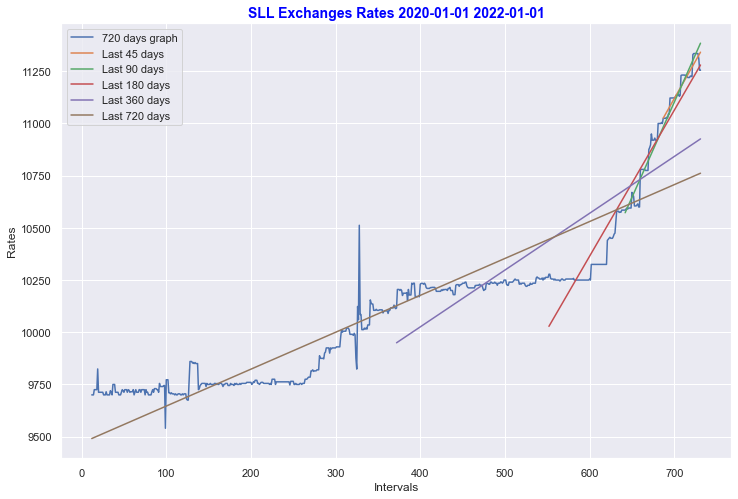

In [324]:
obj.save_plot(intervals, rates)

# Show Plot

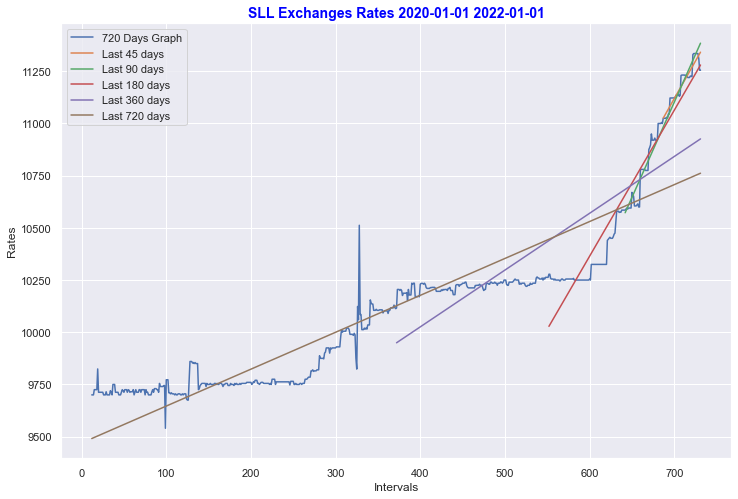

In [325]:
obj.show_plot(intervals, rates)


In [ ]:
m, b = obj.find_line_of_best_fit(intervals, rates)
x, y = obj.find_points(intervals, m, b)
obj.show_in_plot(intervals, rates)